[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aryoerlangga/ziliun_practice_session/blob/master/demo/prediction_house_price.ipynb)

# Predicting Boston House Prices

In this demo:
- You will see how a machine learning model is developed on data collected from homes in suburbs of Boston.
- Model trained on the data then can make certaion prediction about the price of a house.
- This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

Price of the house (as the variable that we want to predict) has continues values, therefore this problem is considered as:
- Supervised learning
- Regression problem

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts

## Load the dataset

In [5]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [6]:
# load data
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [18]:
# print description of the dataset
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
# Assign feature matrix and target variable into Pandas objects, concatenate into a single dataframe for easier inspection
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df_target = pd.Series(data['target'], name='PRICE')
df = pd.concat([df, df_target], axis=1)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exploratory Data Analysis

**Basic information**

In [30]:
df.shape

(506, 14)

In [29]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

**Statistics Descriptive**

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Correlation between features**

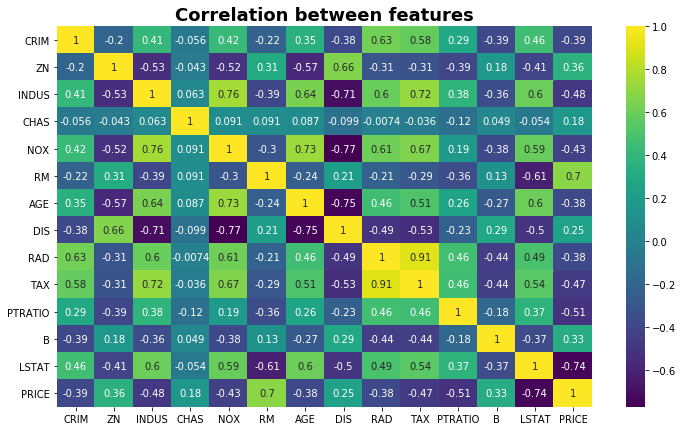

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

train_corr=df.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(train_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

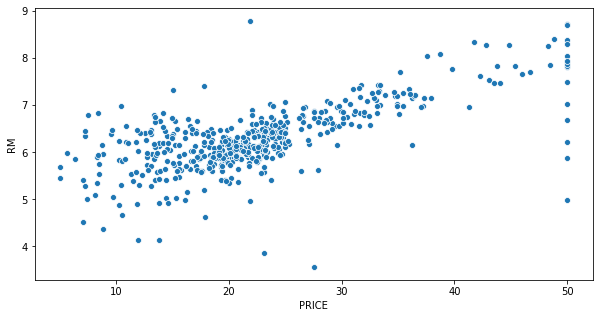

In [27]:
fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(x = 'PRICE', y = 'RM', data = df)

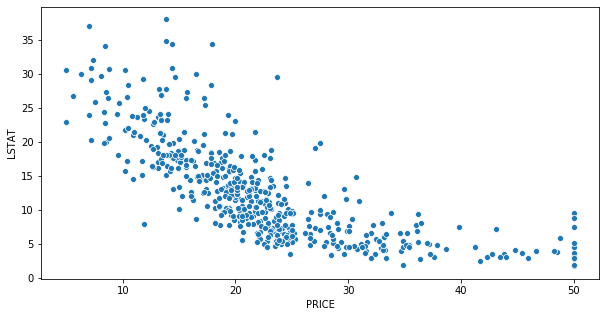

In [28]:
fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(x = 'PRICE', y = 'LSTAT', data = df)

**Distribution check**

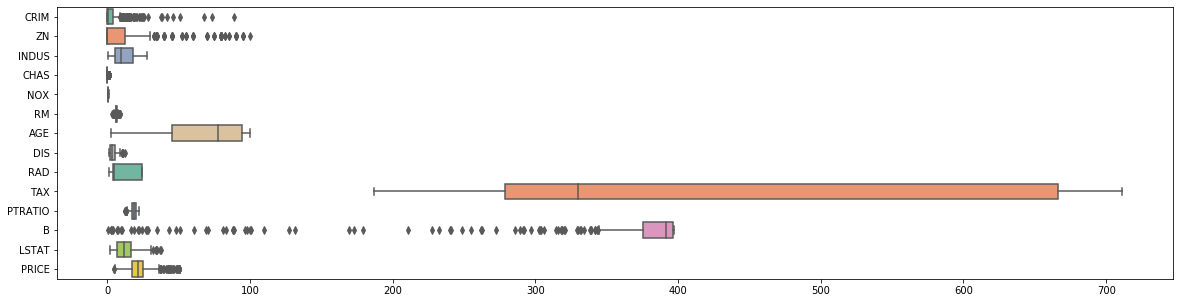

In [37]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data=df,orient='h',palette='Set2')

## Machine learning modeling

### Define the metric

In [44]:
from IPython.display import Image
Image(url= "https://www.oreilly.com/library/view/deep-learning-quick/9781788837996/assets/15697b3b-001e-4120-a0d1-c4447a4dc47f.png")

### Train test split

In [42]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/1202/1*eFydLxeFcmg8Grn1eKOVXQ.png")

In [34]:
# define dependent and independent variable
X = df.drop(['PRICE'], axis = 1)
y = df.PRICE

In [50]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

# test set is 20% of the data, random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Train, build, and evaluate the model

In [74]:
from sklearn.metrics import mean_absolute_error
def modeling(model, X_train, y_train, X_test):
    model.fit(X_train, y_train) # train and build the model
    y_pred = model.predict(X_test) # predict test set with trained model
    performance = mean_absolute_error(y_test, y_pred)
    
    return performance, y_pred

def visualization(y_test, y_pred):
    fig, ax = plt.subplots(figsize = (10,5))
    sns.scatterplot(y_test, y_pred)
    plt.xlabel('actual')
    plt.ylabel('prediction')

**dummy regressor model**

In [62]:
# modelling
from sklearn.dummy import DummyRegressor
model = DummyRegressor() # Load the model

mae_dummy, y_pred_dummy = modeling(model, X_train, y_train, X_test)
print('mae', mae_dummy)

mae 6.255843525529023


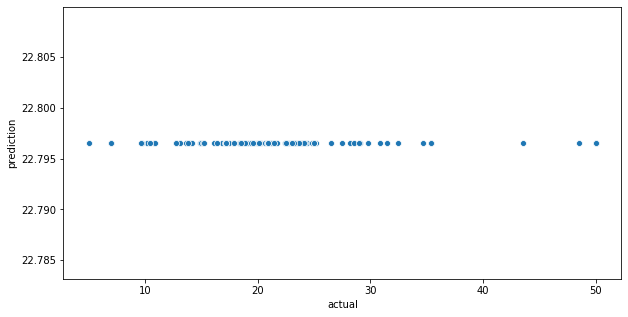

In [75]:
visualization(y_test, y_pred_dummy)

**linear regression model**

In [64]:
# modelling
from sklearn.linear_model import LinearRegression
model = LinearRegression() # Load the model

mae_lr, y_pred_lr = modeling(model, X_train, y_train, X_test)
print('mae', mae_lr)

mae 3.1890919658878745


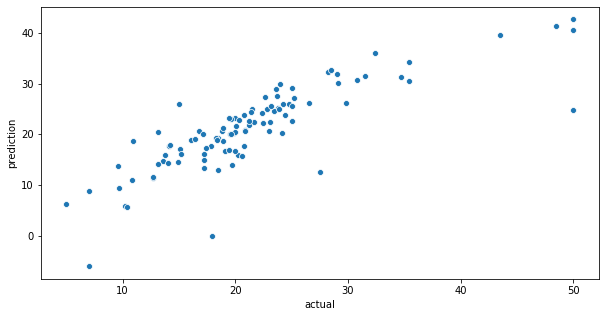

In [76]:
visualization(y_test, y_pred_lr)

**decision tree model**

In [65]:
# modelling
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0) # Load the model

mae_dt, y_pred_dt = modeling(model, X_train, y_train, X_test)
print('mae', mae_dt)

mae 2.3019607843137257


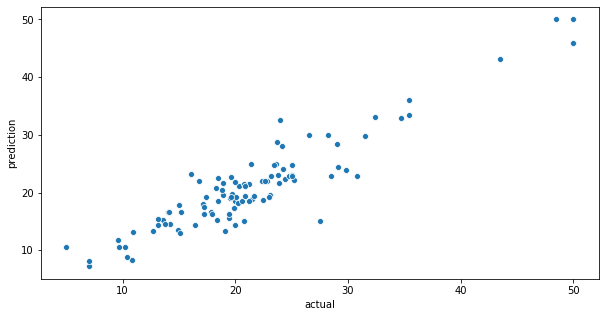

In [77]:
visualization(y_test, y_pred_dt)